Credit Card Approval data provided by UCI Machine Learning Repository


Source : http://archive.ics.uci.edu/ml/datasets/credit+approval

Creator :Aqilah, Fadly, Genta


In [105]:
#import all necesssary packages
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [106]:
#Importing data
df  = pd.read_csv('/content/crx.data', header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [107]:
#Checking data shape
df.shape

(690, 16)

In [108]:
df.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], dtype='int64')

In [109]:
# Checking data shapes
df.dtypes

0      object
1      object
2     float64
3      object
4      object
5      object
6      object
7     float64
8      object
9      object
10      int64
11     object
12     object
13     object
14      int64
15     object
dtype: object

In [110]:
#Checking null data
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
dtype: int64

**Melakukan pengecekan data-data kontinu**

Kita dapat lihat bahwa data di kolom 2,7 dan 10 berada pada rentang yang mirip.

Kolom 14 dapat kita pakai dengan catatan perlu disamakan dulu nilainya jika kita akan menggunakan regresi.

Karena kita akan mencoba menggunakan xgboost, angka tersebut tidak perlu kita normalisasi terlebih dahulu. 

In [111]:
df[1] = df[1].map(lambda x: "0.00" if x == '?' else x)
df[1] = df[1].astype("float")

In [112]:
df.describe()

,1,2,7,10,14
count,690.000000,690.000000,690.000000,690.00000,690.000000
mean,31.019159,4.758725,2.223406,2.40000,1017.385507
std,12.552078,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.000000,0.00000,0.000000
25%,22.440000,1.000000,0.165000,0.00000,0.000000
50%,28.170000,2.750000,1.000000,0.00000,5.000000
75%,37.707500,7.207500,2.625000,3.00000,395.500000
max,80.250000,28.000000,28.500000,67.00000,100000.000000


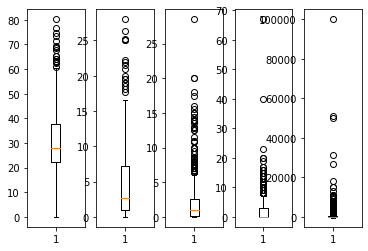

In [113]:
n_rows =1
n_cols =5

# plt.boxplot(df[2])
fig, axs = plt.subplots(n_rows, n_cols)
axs[0].boxplot(df[1])
axs[1].boxplot(df[2])
axs[2].boxplot(df[7])
axs[3].boxplot(df[10])
axs[4].boxplot(df[14])
plt.show()

**Melakukan pengecekan terhadap data-data kategorikal**

Dari data kategorikal kolom 0,3,4,5,6 terdapat tanda "?"
Karena mereka memiliki persebaran dengan angka terbanyak jauh melampaui jumlahnya, maka kita akan coba imput "?" dengan nilai terbesar.

Berikut imputasi yang akan dilakukan :

Kolom 0 diimput "a"

Kolom 3 diimput "u"

Kolom 4 diimput "g"

Kolom 5 diimput "c"

Kolom 6 diimput "v"

Kita juga melihat di kolom 8, 9 dan 11 memiliki nilai f dan t yang kita lihat biner. Sehingga F akan kita ganti dengan 0, dan T kita ganti 1.

Kolom 12 semuanya terisi sehingga tidak perlu kita apa-apakan.

Kolom 13 kita lihat memiliki 171 nilai unik. Meskipun di dokumentasi dinyatakan kontinu. Nilai yang diperoleh tidak wajar, lebih nampak seperti segmentasi nasabah, alih-alih seperti nomor konsumen. Kita juga observasi ada value yang aneh seperti "?". Karena segmentasi ini sangat banyak dan beberapa nilai terbesar tidak bisa mencakup sebagian besar data, kami memutuskan untuk drop kolom ini.

Kolom 15 adalah kolom target kita yang punya nilai + dan -. Agar mempermudah pemodelan, kita asumsikan bahwa + adalah 1 (approve card) dan - adalah 0 (reject card).

In [114]:
df.groupby(0).count()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,,,,,,,,,,,,,,,
?,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
a,210,210,210,210,210,210,210,210,210,210,210,210,210,210,210
b,468,468,468,468,468,468,468,468,468,468,468,468,468,468,468


In [115]:
df.groupby(3).count()

,0,1,2,4,5,6,7,8,9,10,11,12,13,14,15
3,,,,,,,,,,,,,,,
?,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
l,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
u,519,519,519,519,519,519,519,519,519,519,519,519,519,519,519
y,163,163,163,163,163,163,163,163,163,163,163,163,163,163,163


In [116]:
df.groupby(4).count()

,0,1,2,3,5,6,7,8,9,10,11,12,13,14,15
4,,,,,,,,,,,,,,,
?,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
g,519,519,519,519,519,519,519,519,519,519,519,519,519,519,519
gg,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
p,163,163,163,163,163,163,163,163,163,163,163,163,163,163,163


In [117]:
df.groupby(5).count()

,0,1,2,3,4,6,7,8,9,10,11,12,13,14,15
5,,,,,,,,,,,,,,,
?,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
aa,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54
c,137,137,137,137,137,137,137,137,137,137,137,137,137,137,137
cc,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41
d,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30
e,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25
ff,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53
i,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59
j,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10


In [118]:
df.groupby(6).count()

,0,1,2,3,4,5,7,8,9,10,11,12,13,14,15
6,,,,,,,,,,,,,,,
?,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
bb,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59
dd,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
ff,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57
h,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138
j,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
n,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
o,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
v,399,399,399,399,399,399,399,399,399,399,399,399,399,399,399


In [119]:
df.groupby(8).count()

,0,1,2,3,4,5,6,7,9,10,11,12,13,14,15
8,,,,,,,,,,,,,,,
f,329,329,329,329,329,329,329,329,329,329,329,329,329,329,329
t,361,361,361,361,361,361,361,361,361,361,361,361,361,361,361


In [120]:
df.groupby(9).count()

,0,1,2,3,4,5,6,7,8,10,11,12,13,14,15
9,,,,,,,,,,,,,,,
f,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395
t,295,295,295,295,295,295,295,295,295,295,295,295,295,295,295


In [121]:
df.groupby(11).count()

,0,1,2,3,4,5,6,7,8,9,10,12,13,14,15
11,,,,,,,,,,,,,,,
f,374,374,374,374,374,374,374,374,374,374,374,374,374,374,374
t,316,316,316,316,316,316,316,316,316,316,316,316,316,316,316


In [122]:
df.groupby(12).count()

,0,1,2,3,4,5,6,7,8,9,10,11,13,14,15
12,,,,,,,,,,,,,,,
g,625,625,625,625,625,625,625,625,625,625,625,625,625,625,625
p,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
s,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57


In [123]:
df.groupby(13).count()

,0,1,2,3,4,5,6,7,8,9,10,11,12,14,15
13,,,,,,,,,,,,,,,
00000,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132
00017,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
00020,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
00021,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
00022,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
00928,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
00980,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
01160,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [124]:
df.groupby(13).count().sort_values(by=0, ascending = False)

,0,1,2,3,4,5,6,7,8,9,10,11,12,14,15
13,,,,,,,,,,,,,,,
00000,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132
00200,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35
00120,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35
00160,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34
00080,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
00211,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
00208,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
00204,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [125]:
df.groupby(15).count()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
15,,,,,,,,,,,,,,,
+,307,307,307,307,307,307,307,307,307,307,307,307,307,307,307
-,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383


Melakukan Imputasi untuk "?" sesuai analisa di atas

Kolom 0 diimput "a"

Kolom 3 diimput "u"

Kolom 4 diimput "g"

Kolom 5 diimput "c"

Kolom 6 diimput "v"

In [126]:
df[0] = df[0].map(lambda x: "a" if x == '?' else x)
df[3] = df[3].map(lambda x: "u" if x == '?' else x)
df[4] = df[4].map(lambda x: "g" if x == '?' else x)
df[5] = df[5].map(lambda x: "c" if x == '?' else x)
df[6] = df[6].map(lambda x: "v" if x == '?' else x)

In [127]:
# proof of imputing, we pick column 0
df.groupby(0).count()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,,,,,,,,,,,,,,,
a,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222
b,468,468,468,468,468,468,468,468,468,468,468,468,468,468,468


**Melakukan Imputasi untuk 8,9,11 sesuai analisa di atas**

t = 1

f = 0

Kemudian kolom ini kita ubah ke integer

In [128]:
#imputing columns 8, 9, 11
df[8] = df[8].map(lambda x: "1" if x == 't' else "0")
df[9] = df[9].map(lambda x: "1" if x == 't' else "0")
df[11] = df[11].map(lambda x: "1" if x == 't' else "0")

df[8] = df[8].astype('int')
df[9] = df[9].astype('int')
df[11] = df[11].astype('int')

In [129]:
df[[8,9,11]].describe()

,8,9,11
count,690.000000,690.000000,690.000000
mean,0.523188,0.427536,0.457971
std,0.499824,0.495080,0.498592
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


In [130]:
df.groupby(8).count()

,0,1,2,3,4,5,6,7,9,10,11,12,13,14,15
8,,,,,,,,,,,,,,,
0,329,329,329,329,329,329,329,329,329,329,329,329,329,329,329
1,361,361,361,361,361,361,361,361,361,361,361,361,361,361,361


**Drop Kolom 13**

In [131]:
df=df.drop(13, axis =1)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,14,15
0,b,30.83,0.000,u,g,w,v,1.25,1,1,1,0,g,0,+
1,a,58.67,4.460,u,g,q,h,3.04,1,1,6,0,g,560,+
2,a,24.50,0.500,u,g,q,h,1.50,1,0,0,0,g,824,+
3,b,27.83,1.540,u,g,w,v,3.75,1,1,5,1,g,3,+
4,b,20.17,5.625,u,g,w,v,1.71,1,0,0,0,s,0,+


In [132]:
#imputing columns 15
df[15] = df[15].map(lambda x: "1" if x == '+' else "0")

df[15] = df[15].astype('int')

In [133]:
df.groupby(15).count()

,0,1,2,3,4,5,6,7,8,9,10,11,12,14
15,,,,,,,,,,,,,,
0,383,383,383,383,383,383,383,383,383,383,383,383,383,383
1,307,307,307,307,307,307,307,307,307,307,307,307,307,307


In [134]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,14,15
0,b,30.83,0.000,u,g,w,v,1.25,1,1,1,0,g,0,1
1,a,58.67,4.460,u,g,q,h,3.04,1,1,6,0,g,560,1
2,a,24.50,0.500,u,g,q,h,1.50,1,0,0,0,g,824,1
3,b,27.83,1.540,u,g,w,v,3.75,1,1,5,1,g,3,1
4,b,20.17,5.625,u,g,w,v,1.71,1,0,0,0,s,0,1


Melakukan Encoding untuk kolom 0, 3, 4, 5, 6, 12

In [135]:
dummies_var = [0, 3, 4, 5, 6, 12]
df_new = pd.get_dummies(df, prefix=dummies_var, columns=dummies_var )

In [136]:
df_new.head()

,1,2,7,8,9,10,11,14,15,0_a,0_b,3_l,3_u,3_y,4_g,4_gg,4_p,5_aa,5_c,5_cc,5_d,5_e,5_ff,5_i,5_j,5_k,5_m,5_q,5_r,5_w,5_x,6_bb,6_dd,6_ff,6_h,6_j,6_n,6_o,6_v,6_z,12_g,12_p,12_s
0,30.83,0.000,1.25,1,1,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
1,58.67,4.460,3.04,1,1,6,0,560,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,24.50,0.500,1.50,1,0,0,0,824,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,27.83,1.540,3.75,1,1,5,1,3,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
4,20.17,5.625,1.71,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1


In [137]:
len(df_new.columns)

43

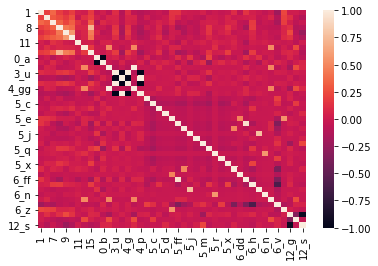

In [138]:
sns.heatmap(df_new.corr())

Melakukan splitting dan rename nama column str jadi int

In [139]:
df_new.columns

Index([     1,      2,      7,      8,      9,     10,     11,     14,     15,
        '0_a',  '0_b',  '3_l',  '3_u',  '3_y',  '4_g', '4_gg',  '4_p', '5_aa',
        '5_c', '5_cc',  '5_d',  '5_e', '5_ff',  '5_i',  '5_j',  '5_k',  '5_m',
        '5_q',  '5_r',  '5_w',  '5_x', '6_bb', '6_dd', '6_ff',  '6_h',  '6_j',
        '6_n',  '6_o',  '6_v',  '6_z', '12_g', '12_p', '12_s'],
      dtype='object')

In [140]:
df_new = df_new.rename({1:"1", 2:"2", 7:"7", 8:"8", 9:"9", 10:"10", 11:"11", 14:"14"})
df_new[1] = df_new[1].astype("float")

In [141]:
y = df_new[15]
X = df_new.drop(15,axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=123, test_size = 0.2)

Melakukan Grid Search dan Modelling menggunakan **XGBoost**

In [142]:
xgb_model =XGBClassifier(learning_rate = 0.01,
                         booster='gbtree', 
                         sampling_method='gradient_based',
                         n_estimators=100,
                         objective = 'binary:logistic', seed = 123)

In [143]:
param_test = {
    'max_depth' : range(4,5,6),
    'min_child_weight':range(4,5,6),
    'gamma': [i/10.0 for i in range(0,5)],
    'subsample':[i/10.0 for i in range(6,10)],
    'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}

gridsearch = GridSearchCV(xgb_model, param_test, scoring='roc_auc', cv = 5)

In [144]:
%%time
gridsearch.fit(X_train, y_train)


CPU times: user 44.2 s, sys: 382 ms, total: 44.5 s
Wall time: 44.5 s


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.01, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     samplin...d',
                                     scale_pos_weight=1, seed=123, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                         'max_depth': range(4, 5, 6),
           

In [145]:
gridsearch.best_params_

{'gamma': 0.4,
 'max_depth': 4,
 'min_child_weight': 4,
 'reg_alpha': 1e-05,
 'subsample': 0.6}

In [146]:
gridsearch.best_score_

0.9367649122049666

In [147]:
# gridsearch.cv_results_

Menggunakan parameter terbaik hasil grid search

In [148]:
xgb_clf = XGBClassifier(learning_rate = 0.01,
                         booster='gbtree', 
                         sampling_method='gradient_based',
                         n_estimators=100,
                         objective = 'binary:logistic', 
                        gamma = 0.4,
                        max_depth = 4,
                        min_child_weight = 4,
                        reg_alpha = 1e-05,
                        subsample = 0.6,
                        seed = 123)

In [149]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.4,
              learning_rate=0.01, max_delta_step=0, max_depth=4,
              min_child_weight=4, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=1e-05, reg_lambda=1, sampling_method='gradient_based',
              scale_pos_weight=1, seed=123, silent=None, subsample=0.6,
              verbosity=1)

In [150]:
y_pred = xgb_clf.predict(X_test)

Result dari Model

In [151]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87        76
           1       0.86      0.79      0.82        62

    accuracy                           0.85       138
   macro avg       0.85      0.84      0.84       138
weighted avg       0.85      0.85      0.85       138



In [152]:
print(roc_auc_score(y_test, y_pred))

0.8425297113752123


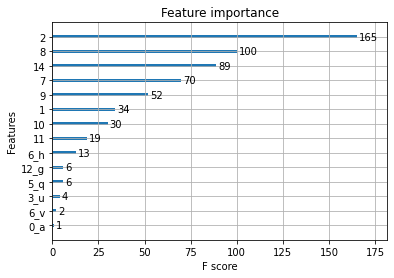

In [153]:
from xgboost import plot_importance
plot_importance(xgb_clf)

In [154]:
X1 = df_new.drop([15,'0_a','0_b','4_g','4_gg','4_p'],axis=1)
X1.head()

,1,2,7,8,9,10,11,14,3_l,3_u,3_y,5_aa,5_c,5_cc,5_d,5_e,5_ff,5_i,5_j,5_k,5_m,5_q,5_r,5_w,5_x,6_bb,6_dd,6_ff,6_h,6_j,6_n,6_o,6_v,6_z,12_g,12_p,12_s
0,30.83,0.000,1.25,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
1,58.67,4.460,3.04,1,1,6,0,560,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,24.50,0.500,1.50,1,0,0,0,824,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,27.83,1.540,3.75,1,1,5,1,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
4,20.17,5.625,1.71,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1


In [155]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y, random_state=123, test_size = 0.2)

In [156]:
xgb_model1 =XGBClassifier(learning_rate = 0.1,
                         booster='gbtree', 
                         sampling_method='gradient_based',
                         n_estimators=1000,
                         objective = 'binary:logistic', seed = 123)

In [157]:
param_test1 = {
    'max_depth' : range(4,5,6),
    'min_child_weight':range(4,5,6),
    'gamma': [i/10.0 for i in range(0,5)],
    'subsample':[i/10.0 for i in range(6,10)],
    'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}

gridsearch1 = GridSearchCV(xgb_model1, param_test1, scoring='roc_auc', cv = 5)

In [158]:
%%time
gridsearch1.fit(X1_train, y1_train)

CPU times: user 5min 11s, sys: 2.74 s, total: 5min 14s
Wall time: 5min 13s


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=1000, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     samplin...d',
                                     scale_pos_weight=1, seed=123, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                         'max_depth': range(4, 5, 6),
           

In [159]:
gridsearch1.best_params_

{'gamma': 0.4,
 'max_depth': 4,
 'min_child_weight': 4,
 'reg_alpha': 1,
 'subsample': 0.8}

In [160]:
gridsearch1.best_score_

0.9227004392449736

In [161]:
xgb_clf1 = XGBClassifier(learning_rate = 0.01,
                         booster='gbtree', 
                         sampling_method='gradient_based',
                         n_estimators=100,
                         objective = 'binary:logistic', 
                        gamma = 0.4,
                        max_depth = 4,
                        min_child_weight = 4,
                        reg_alpha = 1,
                        subsample = 0.8,
                        seed = 123)

In [162]:
xgb_clf1.fit(X1_train, y1_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.4,
              learning_rate=0.01, max_delta_step=0, max_depth=4,
              min_child_weight=4, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=1, reg_lambda=1, sampling_method='gradient_based',
              scale_pos_weight=1, seed=123, silent=None, subsample=0.8,
              verbosity=1)

In [163]:
y1_pred = xgb_clf1.predict(X1_test)

In [164]:
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87        76
           1       0.86      0.81      0.83        62

    accuracy                           0.86       138
   macro avg       0.86      0.85      0.85       138
weighted avg       0.86      0.86      0.85       138



In [165]:
print(roc_auc_score(y1_test, y1_pred))

0.8505942275042444


Kembali menyeleksi variabel berdasarkan feature importance, dan menjalankan ulang Gridsearch untuk model XGBoost

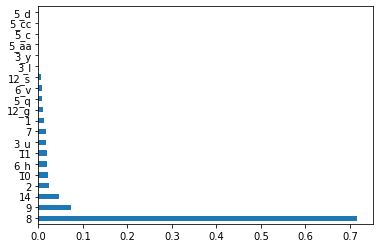

8       0.716337
9       0.073434
14      0.045384
2       0.023015
10      0.021166
6_h     0.020178
11      0.018410
3_u     0.017756
7       0.016209
1       0.013429
12_g    0.011537
5_q     0.008837
6_v     0.008158
12_s    0.006150
3_l     0.000000
3_y     0.000000
5_aa    0.000000
5_c     0.000000
5_cc    0.000000
5_d     0.000000
dtype: float32


In [166]:
#check Feature importance to know the possibility of imporoving the model
feat_importances = pd.Series(xgb_clf1.feature_importances_, index=X1_train.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()
print(feat_importances.nlargest(20))

In [167]:
#Improve model
limited_col = [8,9,14,2,10,'6_h']
X2_train  = X1_train[limited_col].copy()
X2_test = X1_test[limited_col].copy()

In [168]:
xgb_model2 =XGBClassifier(learning_rate = 0.1,
                         booster='gbtree', 
                         sampling_method='gradient_based',
                         n_estimators=1000,
                         objective = 'binary:logistic', seed = 123)

In [169]:
param_test2 = {
    'max_depth' : range(4,5,6),
    'min_child_weight':range(4,5,6),
    'gamma': [i/10.0 for i in range(0,5)],
    'subsample':[i/10.0 for i in range(6,10)],
    'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}

gridsearch2 = GridSearchCV(xgb_model2, param_test2, scoring='roc_auc', cv = 5)

In [170]:
%%time
gridsearch2.fit(X2_train, y1_train)

CPU times: user 2min, sys: 2.78 s, total: 2min 3s
Wall time: 2min 2s


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=1000, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     samplin...d',
                                     scale_pos_weight=1, seed=123, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                         'max_depth': range(4, 5, 6),
           

In [171]:
gridsearch2.best_params_

{'gamma': 0.4,
 'max_depth': 4,
 'min_child_weight': 4,
 'reg_alpha': 1,
 'subsample': 0.7}

In [172]:
gridsearch2.best_score_

0.9337608866920644

In [173]:
xgb_clf2 = XGBClassifier(learning_rate = 0.01,
                         booster='gbtree', 
                         sampling_method='gradient_based',
                         n_estimators=100,
                         objective = 'binary:logistic', 
                        gamma = 0.4,
                        max_depth = 4,
                        min_child_weight = 4,
                        reg_alpha = 1,
                        subsample = 0.7,
                        seed = 123)

In [174]:
xgb_clf2.fit(X2_train, y1_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.4,
              learning_rate=0.01, max_delta_step=0, max_depth=4,
              min_child_weight=4, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=1, reg_lambda=1, sampling_method='gradient_based',
              scale_pos_weight=1, seed=123, silent=None, subsample=0.7,
              verbosity=1)

In [175]:
y2_pred = xgb_clf2.predict(X2_test)

In [176]:
print(classification_report(y1_test, y2_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        76
           1       0.85      0.82      0.84        62

    accuracy                           0.86       138
   macro avg       0.85      0.85      0.85       138
weighted avg       0.85      0.86      0.85       138



In [177]:
print(roc_auc_score(y1_test, y2_pred))

0.8520797962648557


Tidak ada peningkatan berarti dari ROC AUC Score, sehingga dilakukan run terhadap beberapa model sebagai pembanding dengan 6 variabel utama.

In [178]:
#Import several classifiers Model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score

In [179]:
#Create dictionary for all classifier
classifiers = {
    "LogisticRegression" : LogisticRegression(),
    "KNeighbors" : KNeighborsClassifier(),
    "SVC" : SVC(),
    "DecisionTree" : DecisionTreeClassifier(),
    "RandomForest" : RandomForestClassifier(),
    'XGBoost':XGBClassifier()
}

In [182]:
#Build models using several classifiers to compare
for key, classifier in classifiers.items():
    print('__________________________')
    print(key)
    steps = [('scaler', StandardScaler()),
        (key, classifier)]
    pipeline = Pipeline(steps)
    pipeline.fit(X2_train, y1_train)
    train_score = pipeline.score(X2_train, y1_train)
    print('train score: ', train_score)
    test_score = pipeline.score(X2_test, y1_test)
    print('test score: ', test_score)
    y_pred_pipeline = pipeline.predict(X2_test)
    print('precision_score: ',precision_score(y1_test, y_pred_pipeline))
    print(classification_report(y1_test, y_pred_pipeline))
    print('ROC AUC Score:',roc_auc_score(y1_test, y_pred_pipeline))



__________________________
LogisticRegression
train score:  0.855072463768116
test score:  0.8623188405797102
precision_score:  0.8208955223880597
              precision    recall  f1-score   support

           0       0.90      0.84      0.87        76
           1       0.82      0.89      0.85        62

    accuracy                           0.86       138
   macro avg       0.86      0.86      0.86       138
weighted avg       0.87      0.86      0.86       138

ROC AUC Score: 0.8646010186757215
__________________________
KNeighbors
train score:  0.8858695652173914
test score:  0.8333333333333334
precision_score:  0.8545454545454545
              precision    recall  f1-score   support

           0       0.82      0.89      0.86        76
           1       0.85      0.76      0.80        62

    accuracy                           0.83       138
   macro avg       0.84      0.83      0.83       138
weighted avg       0.84      0.83      0.83       138

ROC AUC Score: 0.82640067

Conclusion:


1.   Nilai ROC AUC score terbesar didapatkan menggunakan model Logistic  Regression (86.4%)
2.   6 Variabel utama yang memengaruhi prediksi : 8,9,14,2,10, dan '6_h'
3.   Masih ada potensi improvement dengan melakukan gridsearch pada logistic regression

